# Genomic Data Analysis

In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from helpers import load_config


In [3]:
configs = load_config(os.path.join("configs", "configs.yaml"))

In [4]:
study_path = configs["STORAGE_DIR_STUDY2"]

In [5]:
mutations_df = pd.read_csv(
    os.path.join(study_path, "data_mutations.txt"),
    sep="\t",
    header=0
)
mutations_df.head()

/var/folders/_0/qrjsyj4n0r951n63lt8qdzrc0000gn/T/ipykernel_81249/1016927232.py:1: DtypeWarning: Columns (4,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  mutations_df = pd.read_csv(


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,SYMBOL_SOURCE,TREMBL,TSL,UNIPARC,VARIANT_CLASS,all_effects,cDNA_position,n_depth,t_depth,Annotation_Status
0,DMBT1,1755.0,.,GRCh37,10,124399948,124399948,+,synonymous_variant,Silent,...,HGNC,B6V682_HUMAN,.,UPI000047021C,SNV,"DMBT1,synonymous_variant,p.%3D,ENST00000368956...",7054,115,131,SUCCESS
1,C10orf90,118611.0,.,GRCh37,10,128193330,128193330,+,missense_variant,Missense_Mutation,...,HGNC,"S4R3N7_HUMAN,Q5T025_HUMAN",.,UPI00001D808F,SNV,"C10orf90,missense_variant,p.Val100Met,ENST0000...",560,63,64,SUCCESS
2,WDFY4,57705.0,.,GRCh37,10,49997997,49997997,+,missense_variant,Missense_Mutation,...,HGNC,Q6PIM1_HUMAN,.,UPI000176ADB8,SNV,"WDFY4,missense_variant,p.Arg1345Trp,ENST000003...",4060,148,149,SUCCESS
3,PRKCQ,5588.0,.,GRCh37,10,6533674,6533674,+,missense_variant,Missense_Mutation,...,HGNC,.,.,UPI000012DF74,SNV,"PRKCQ,missense_variant,p.Gly254Val,ENST0000039...",861,197,228,SUCCESS
4,DYNC2H1,79659.0,.,GRCh37,11,103153768,103153768,+,missense_variant,Missense_Mutation,...,HGNC,.,.,UPI0000481AC7,SNV,"DYNC2H1,missense_variant,p.Pro3622Leu,ENST0000...",10865,204,199,SUCCESS


In [6]:
mutations_df[["Hugo_Symbol", "Tumor_Sample_Barcode"]]

,Hugo_Symbol,Tumor_Sample_Barcode
0,DMBT1,TCGA-3L-AA1B-01
1,C10orf90,TCGA-3L-AA1B-01
2,WDFY4,TCGA-3L-AA1B-01
3,PRKCQ,TCGA-3L-AA1B-01
4,DYNC2H1,TCGA-3L-AA1B-01
...,...,...
332605,KRTAP1-3,TCGA-5M-AAT6-01
332606,ORM2,TCGA-5M-AAT6-01
332607,OR13C5,TCGA-CM-6171-01
332608,ORM2,TCGA-G4-6588-01


In [7]:
print(mutations_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332610 entries, 0 to 332609
Columns: 114 entries, Hugo_Symbol to Annotation_Status
dtypes: float64(3), int64(9), object(102)
memory usage: 289.3+ MB
None


In [8]:
print(mutations_df.columns)

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification',
       ...
       'SYMBOL_SOURCE', 'TREMBL', 'TSL', 'UNIPARC', 'VARIANT_CLASS',
       'all_effects', 'cDNA_position', 'n_depth', 't_depth',
       'Annotation_Status'],
      dtype='object', length=114)


### Transforming data into one line per sample_id and all mutated genes comma-separated in the same line

In [9]:
mutations_df1 = mutations_df[["Hugo_Symbol", "Tumor_Sample_Barcode"]]

# Group by sample_id and aggregate mutations into a comma-separated string
grouped = mutations_df1.groupby('Tumor_Sample_Barcode')


mutations_df2 = grouped.agg(
    Mutation_Count=('Hugo_Symbol', 'count'),           # Define the name for the mutation count column
    Mutations=('Hugo_Symbol', lambda x: ', '.join(x))  # Define the name for the aggregated mutation column
).reset_index()

mutations_df2.head()

,Tumor_Sample_Barcode,Mutation_Count,Mutations
0,TCGA-3L-AA1B-01,185,"DMBT1, C10orf90, WDFY4, PRKCQ, DYNC2H1, SPON1,..."
1,TCGA-4N-A93T-01,151,"MYO3A, ARMC4, WAC, SVIL, KIAA1462, KIAA1462, K..."
2,TCGA-4T-AA8H-01,187,"CCDC147, LRRC37A6P, PCDH15, NRBF2, PIK3AP1, SL..."
3,TCGA-5M-AAT4-01,268,"PRLHR, PRLHR, ATE1, PTCHD3, SVIL, C10ORF68, PA..."
4,TCGA-5M-AAT5-01,134,"GPR123, ARHGAP21, VSTM4, CDH23, ITIH5, OR51S1,..."


In [10]:
mutations_df2.to_csv(
    os.path.join(study_path, 'all_mutations_summary.csv'), index=False)

In [11]:
mutations_df2.sort_values(by="Mutation_Count", ascending=False)

,Tumor_Sample_Barcode,Mutation_Count,Mutations
240,TCGA-AG-A002-01,17069,"PYROXD2, PYROXD2, HPSE2, HPSE2, CNNM1, CNNM1, ..."
301,TCGA-CA-6717-01,13582,"PYROXD2, PYROXD2, ABCC2, DNMBP, DNMBP, DNMBP, ..."
480,TCGA-F5-6814-01,13465,"R3HCC1L, HPSE2, HPSE2, GOT1, GOT1, GOT1, NKX2-..."
150,TCGA-AA-A010-01,11326,"HPSE2, HPSE2, CNNM1, GOT1, GOT1, NKX2-3, ABCC2..."
278,TCGA-AZ-4315-01,9853,"LOXL4, HPSE2, HPSE2, CNNM1, CNNM1, NKX2-3, SLC..."
...,...,...,...
212,TCGA-AG-3602-01,19,"ERN2, CASKIN2, UPF1, LIG1, SBK2, FUT3, FUT5, F..."
209,TCGA-AG-3594-01,18,"GATA3, IMP3, PLK1, ZNF423, HYDIN, JPH3, HID1, ..."
149,TCGA-AA-A00Z-01,18,"PLCE1, TRPM1, CLDN9, KRTAP17-1, SOX9, SALL3, A..."
213,TCGA-AG-3605-01,16,"FFAR4, MYOD1, NDN, NDUFB10, MPP2, PAPPA2, PLA2..."


## Filtering down to useful gene mutations only

Used Chapter 25 in this research book to identify gene mutations associated with Colorectal cancer

Link: https://ebookcentral-proquest-com.gate.lib.buffalo.edu/lib/buffalo/detail.action?docID=30795817#goto_toc

The mutations were then listed in colorectal_gene_mutations.txt file

In [12]:
file_location = os.path.join("colorectal_adenocarcinoma", "colorectal_gene_mutations.txt")
with open(file_location, "r") as file:
    text = file.read()
colo_mutations = text.split("\n")
print(f"No.of relevant mutations: {len(colo_mutations)}, Sample genes: {colo_mutations[:2]}")

No.of relevant mutations: 40, Sample genes: ['CMS1', 'CMS2']


In [13]:
mutations_df["Hugo_Symbol"] = mutations_df["Hugo_Symbol"].str.upper()
print(f"Shape before filtering out irrelevant mutations: {mutations_df.shape}")
mutations_df = mutations_df[mutations_df['Hugo_Symbol'].isin(colo_mutations)]
print(f"Shape after filtering out irrelevant mutations: {mutations_df.shape}")

Shape before filtering out irrelevant mutations: (332610, 114)
Shape after filtering out irrelevant mutations: (2445, 114)


In [14]:
mutations_df1 = mutations_df[["Hugo_Symbol", "Tumor_Sample_Barcode"]]
print(f"Mutations df before removing duplicates: {mutations_df1.shape}")
mutations_df1 = mutations_df1.drop_duplicates()
print(f"Mutations df after removing duplicates: {mutations_df1.shape}")


Mutations df before removing duplicates: (2445, 2)
Mutations df after removing duplicates: (1820, 2)


In [15]:
# Group by sample_id and aggregate mutations into a comma-separated string
grouped = mutations_df1.groupby('Tumor_Sample_Barcode')


mutations_df2 = grouped.agg(
    Mutation_Count=('Hugo_Symbol', 'count'),           # Define the name for the mutation count column
    Mutations=('Hugo_Symbol', lambda x: ', '.join(set(x)))  # Define the name for the aggregated mutation column
).reset_index()

mutations_df2.sort_values(by="Mutation_Count", ascending=False)

,Tumor_Sample_Barcode,Mutation_Count,Mutations
447,TCGA-F5-6814-01,19,"PIK3CB, SCG5, EGFR, GREM1, PIK3CD, PTEN, MSH6,..."
209,TCGA-AG-A002-01,19,"PIK3CB, EGFR, GREM1, PTEN, MSH6, APC, RNF43, D..."
420,TCGA-EI-6917-01,18,"APC, POLD1, BRAF, NTRK1, PIK3CB, PIK3CA, DCC, ..."
269,TCGA-CA-6717-01,17,"BMPR1A, APC, BRAF, PIK3CB, PIK3CA, DCC, EGFR, ..."
106,TCGA-AA-3864-01,16,"APC, RNF43, NTRK1, PIK3CA, TGFBR2, SMAD4, NRAS..."
...,...,...,...
45,TCGA-A6-A565-01,1,SMAD4
413,TCGA-EI-6513-01,1,APC
422,TCGA-EI-7004-01,1,RNF43
38,TCGA-A6-6651-01,1,TP53


In [16]:
mutations_df2.to_csv(
    os.path.join(study_path, 'mutations_summary.csv'), index=False)

## Exploring GIT embeddings

In [17]:
git_data_dir = "./Dataset/git_data/data/"
# gene_emb_dir = "./Dataset/git_data/data/gene_emb_finetune.npy"
gene_emb_matrix = np.load(git_data_dir + "gene_emb_finetune.npy")
print(f"Gene Embedding Matrix Shape: {gene_emb_matrix.shape}")

Gene Embedding Matrix Shape: (19782, 512)


In [18]:
# read and prepare gene2idx and idx2gene mappings
with open(git_data_dir + "idx2gene.txt", "r") as f:
    idx2gene_raw = [line.strip() for line in f.readlines()]  # Index to gene name mapping

idx2gene = {}

for text in idx2gene_raw:
    colon_index = text.find(':')
    idx = int(text[:colon_index])
    gene = text[colon_index+2:]
    idx2gene[idx] = gene

gene2idx = {}
for idx, gene in idx2gene.items():
    gene2idx[gene] = idx

In [19]:
# check if all mutations of interest are present in GIT embeddings

print("Relevant mutations not present in GIT Embeddings: ")
for mutation in colo_mutations:
    if mutation not in gene2idx.keys():
        print(mutation, end=", ")


Relevant mutations not present in GIT Embeddings: 
CMS1, CMS2, CMS3, CMS4, PSM2, POLD, SCG5, SMADH4, 

8 out of 40 relevant mutations are not in GIT embeddings

## Try classfication using one-hot encoding

In [20]:
mutations_df1

,Hugo_Symbol,Tumor_Sample_Barcode
58,NRAS,TCGA-3L-AA1B-01
104,PIK3CA,TCGA-3L-AA1B-01
122,APC,TCGA-3L-AA1B-01
142,BRAF,TCGA-3L-AA1B-01
199,KRAS,TCGA-4N-A93T-01
...,...,...
330383,NTRK3,TCGA-EI-6507-01
330404,NTRK1,TCGA-EI-6507-01
330669,ENG,TCGA-EI-6882-01
330831,GREM1,TCGA-EI-6917-01


In [21]:
one_hot_df = pd.crosstab(mutations_df1['Tumor_Sample_Barcode'], mutations_df1['Hugo_Symbol']).reset_index()
print(f"Shape of one hot encoded df: {one_hot_df.shape}")
one_hot_df.columns.name = None
one_hot_df.head(2)

Shape of one hot encoded df: (495, 34)


,Tumor_Sample_Barcode,APC,BAX,BMPR1A,BRAF,DCC,EGFR,ENG,EPCAM,ERBB2,...,PIK3CD,POLD1,POLE,PTEN,RNF43,SCG5,SMAD4,STK11,TGFBR2,TP53
0,TCGA-3L-AA1B-01,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,TCGA-4N-A93T-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
one_hot_df.to_csv(
    os.path.join(study_path, "all_samples_40_genes_one_hot.csv"), 
    index=False
)

In [25]:
# one_hot_df.drop("Tumor_Sample_Barcode", axis=1).sum().sort_values()
one_hot_df.drop("Tumor_Sample_Barcode", axis=1).sum().sort_index

<bound method Series.sort_index of APC       388
BAX         8
BMPR1A     11
BRAF       63
DCC        51
EGFR       26
ENG        18
EPCAM       5
ERBB2      27
GREM1      17
KRAS      220
MLH1       23
MSH2       28
MSH3       14
MSH6       28
MUTYH      13
NRAS       35
NTHL1       5
NTRK1      15
NTRK2      30
NTRK3      30
PIK3CA    151
PIK3CB     14
PIK3CD     18
POLD1      33
POLE       42
PTEN       37
RNF43      48
SCG5        2
SMAD4      70
STK11      10
TGFBR2     23
TP53      317
dtype: int64>

Relevant mutations not present in GIT Embeddings and their count in data:    
- CMS1 - 0
- CMS2 - 0
- CMS3 - 0 
- CMS4 - 0
- PSM2 - 0
- POLD - 0
- SCG5 - 2
- SMADH4 - 70

Next steps, check the frequency of mutations in the 60 records of interet and eloiminate more mutations.

#### Filter to only cases with recurrence

In [26]:
pathological_df = pd.read_csv(
    os.path.join(study_path, "pathological_df.csv")
)
pathological_df.shape

(63, 18)

In [24]:
one_hot_df = one_hot_df.rename(
    columns={"Tumor_Sample_Barcode": "SAMPLE_ID"}
)

In [25]:
one_hot_df2 = pd.merge(pathological_df["SAMPLE_ID"], one_hot_df, on='SAMPLE_ID', how="inner")
one_hot_df2.drop("SAMPLE_ID", axis=1).sum().sort_values(ascending=False)

APC       47
TP53      42
KRAS      32
PIK3CA    17
SMAD4     10
DCC        6
POLE       6
POLD1      4
NTRK2      3
BRAF       3
NRAS       3
PTEN       3
RNF43      3
MLH1       2
ERBB2      2
NTRK3      2
NTRK1      2
PIK3CD     1
TGFBR2     1
NTHL1      1
MSH2       1
GREM1      1
ENG        1
BAX        0
MUTYH      0
PIK3CB     0
MSH6       0
MSH3       0
EPCAM      0
SCG5       0
STK11      0
EGFR       0
BMPR1A     0
dtype: int64

Keeping columns with atleast one non-zero row

In [26]:
subset_1 = one_hot_df2[["APC", "TP53", "KRAS", "PIK3CA", "SMAD4", "DCC", "POLE", "POLD1", "NTRK2", "BRAF", "NRAS", "PTEN", "RNF43", "MLH1", "ERBB2", "NTRK3", "NTRK1", "PIK3CD", "TGFBR2", "NTHL1", "MSH2", "GREM1", "ENG"]]

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

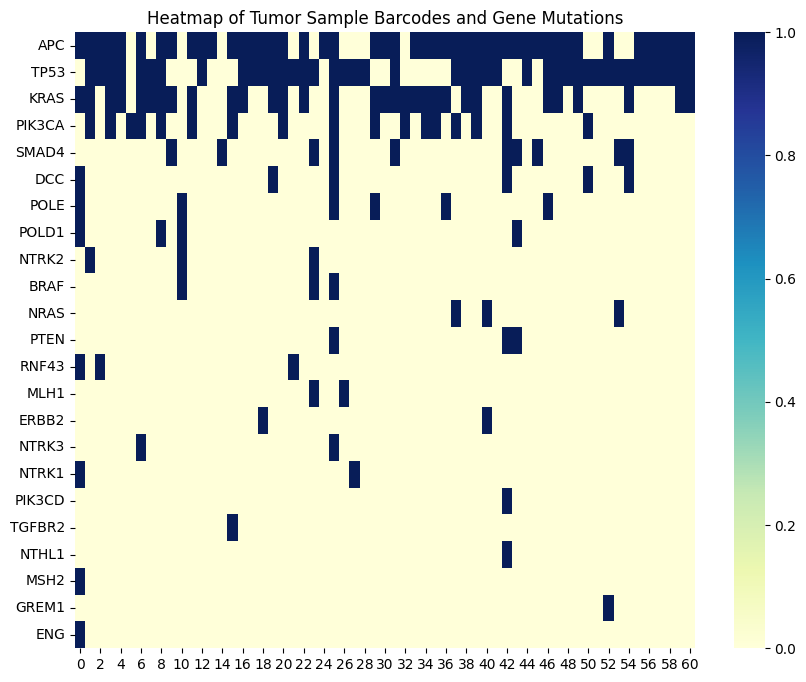

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(subset_1.T, cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Tumor Sample Barcodes and Gene Mutations')
plt.show()


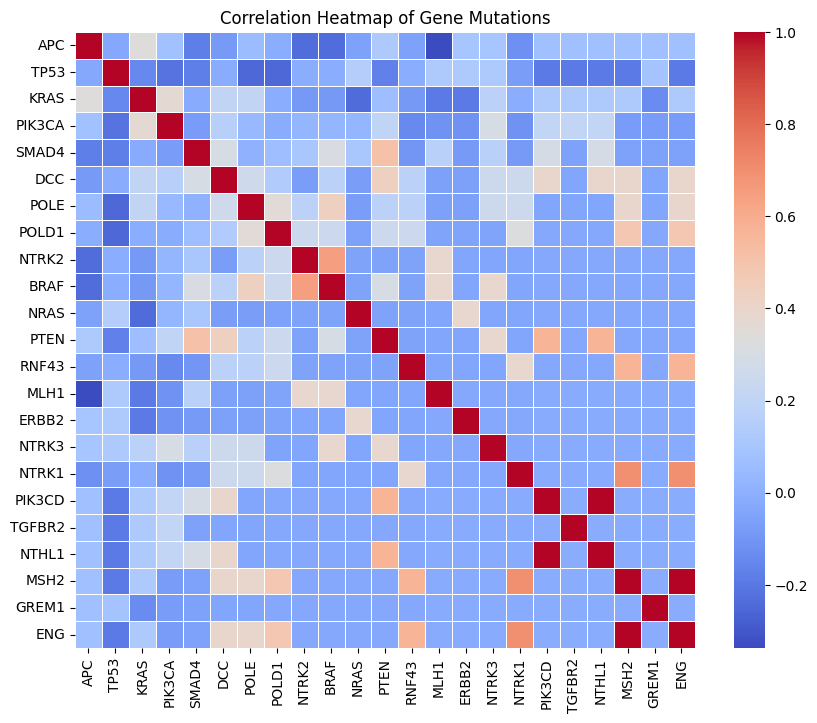

In [29]:
corr_matrix = subset_1.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap of Gene Mutations')
plt.show()


High correlation pairs: 
- PIK3CD - NTHL1
- MSH2 - ENG

Rule of thumb: ideal no of columns = rows/5 to rows/6 = 10 to 12 columns    

Using first 12 columns based on the frequency of values.

In [30]:
mutation_X = one_hot_df2[["SAMPLE_ID", "APC", "TP53", "KRAS", "PIK3CA", "SMAD4", "DCC", "POLE", "POLD1", "NTRK2", "BRAF", "NRAS", "PTEN"]]
mutation_X.head(2)

,SAMPLE_ID,APC,TP53,KRAS,PIK3CA,SMAD4,DCC,POLE,POLD1,NTRK2,BRAF,NRAS,PTEN
0,TCGA-5M-AAT6-01,1,0,1,0,0,1,1,1,0,0,0,0
1,TCGA-5M-AATE-01,1,1,1,1,0,0,0,0,1,0,0,0


## Prepare y for multiclass classification

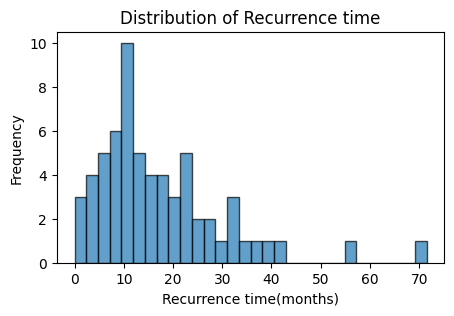

In [31]:
# Plot the distribution
plt.figure(figsize=(5, 3))
plt.hist(pathological_df['PFS_MONTHS'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Recurrence time')
plt.xlabel('Recurrence time(months)')
plt.ylabel('Frequency')

# Display the plot
plt.show()


In [32]:
df = pd.merge(pathological_df[["SAMPLE_ID", "PFS_MONTHS"]], mutation_X, on='SAMPLE_ID', how="inner")
df.head(2)

,SAMPLE_ID,PFS_MONTHS,APC,TP53,KRAS,PIK3CA,SMAD4,DCC,POLE,POLD1,NTRK2,BRAF,NRAS,PTEN
0,TCGA-5M-AAT6-01,7.199921,1,0,1,0,0,1,1,1,0,0,0,0
1,TCGA-5M-AATE-01,26.629845,1,1,1,1,0,0,0,0,1,0,0,0


In [33]:
def categorize_pfs(months):
    """categorize pfs into 3 classes at thresholds 12, 36, 36+"""
    if months <= 12:
        return 0
    elif 12 < months <= 36:
        return 1
    else:
        return 2


df['y'] = df['PFS_MONTHS'].apply(categorize_pfs)
df.head(2)

,SAMPLE_ID,PFS_MONTHS,APC,TP53,KRAS,PIK3CA,SMAD4,DCC,POLE,POLD1,NTRK2,BRAF,NRAS,PTEN,y
0,TCGA-5M-AAT6-01,7.199921,1,0,1,0,0,1,1,1,0,0,0,0,0
1,TCGA-5M-AATE-01,26.629845,1,1,1,1,0,0,0,0,1,0,0,0,1


/var/folders/_0/qrjsyj4n0r951n63lt8qdzrc0000gn/T/ipykernel_91805/1661662862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


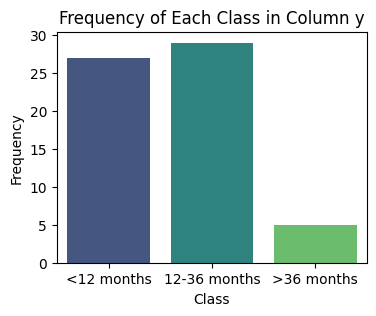

In [34]:
# Calculate the frequency of each class in column 'y'
class_counts = df['y'].value_counts().sort_index()

# Plot the frequency using a bar plot
plt.figure(figsize=(4, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency of Each Class in Column y')
plt.xticks([0, 1, 2], ['<12 months', '12-36 months', '>36 months'])
plt.show()


Find 23 rows to add in class 3 (>36 months).    

To be done in next notebook. This notebook has already become too long.

In [35]:
df.to_csv(
    os.path.join(study_path, "mutation_three_classes_1.csv"), 
    index=False
)